# SMART GOAL #1
GAN RESEARCH

Source Link #1 : https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f <br>
Source Link #2 : https://www.youtube.com/watch?v=Sw9r8CL98N0 <br>

GAN is compromised of 2 different models, the generator and the discriminator. <br>
<b>Generator</b> is an unsupervised learning and takes input data and blindly creates a new "fake" data. <br>
<b>Discriminator</b> is a supervised learning takes the output data from the Generator and the real data. It classifies data from the Generator as real (if generator actaully generated it) or fake (if it's taken from the data set).

Both the generator and discriminator will be competing against each other to train themselves. <br>
The result we will want is the discriminator will not be able to distinguish if the images generated are fake or not.

I will need to use TensorFlow, Keras, PyTorch <br>
Here is the link to the possible models in TensorFlow : https://github.com/wiseodd/generative-models/tree/master/GAN <br>
In this case, I will need to identify which model will work best with our dataset (possible future smart goals).

#### QUESTIONS
What type of datasets does GAN take?<br>
How can we tweak our architect of the GAN?<br>
What type of GAN will we be using?<br>

#### How can we implement the GAN's generator and discriminator?
Tutorial on how we can implement a simple GAN : https://blog.paperspace.com/implementing-gans-in-tensorflow/ <br>
We need to understand what is going on inside of the GAN. Therefore, we will also need to implement our own testing GAN to get an understanding of how we can use and create future GANS.

Here I follow a tutorial and try to understand how to implement the GAN using TensorFlow.

In [ ]:
#Import libraries for testing
import tensorflow as tf
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

batch_size = 256

In [ ]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

In [ ]:
#In the tutorial, the user creates a random data of 10000 samples, 2D array. Here I will use data sample from SMART Goal #4 as input.
#Generator. Z = data input, hsize = [16 nodes for layer1, 16 nodes for layer2], reuse = false (will not reuse layers)
def generator(Z,hsize=[16, 16],reuse=True):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,1)

    return out

In [ ]:
#Discriminator. X = our original dataset, other parameters are same as above.
#This also haves an extra hidden layer, h3, for....
def discriminator(X,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,1)
        out = tf.layers.dense(h3,1)

    return out, h3

In [ ]:
#These placeholders are storage for us, in which tf.float32 is the type (in this case 32 bit float)
#[None,2] represents : None = any number of rows, 2 = 2 columns.
X = tf.placeholder(tf.float32,[None,1])
Z = tf.placeholder(tf.float32,[None,1])

In [ ]:
#Here we set up the generator and discriminator
#G_sample = generated data, r_logits/r_rep = real data, f_logits,g_rep = generated data
G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)

In [ ]:
#The loss function for discriminator and generator, need to understand how this works and how it can be tweaked.
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

In [ ]:
#The training for the discriminator and genereator, once again I will need to understand how this works and how it can be tweaked.
gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step

In [ ]:
#Here is the iteration for the GAN, again, I will need to understand how this works and tweaked.
for i in range(999):
    X_batch = random_data(n=batch_size)
    Z_batch = sample_Z(batch_size, 1)
    _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    print ("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))

In [ ]:
#Need to fix iterator (shape) and generator

# SMART GOAL #2
FUNDAMENTAL ANALYSIS RESEARCH

As we already know, fundamental analysis looks at the health and performance of the companies or industries by analyzing key values(fundamentals), rather than the technical data. It also uses quantitative analysis to make decisions. Before I talk more about quantitative analysis, I would like to talk about the 2 factors in fundamental analysis, long and short.

<b>Long</b> - buy securities and usually haves no plan to sell till far future (Usually a company who's health and performance is very good). This is basically the most common strategy most investors use (though a lot do not know how to perform such evaluation). <br>

<b>Short</b> - sell securities and buys back at a lower price (Usually companies with mild or bad health and performance). By doing this, one can earn back some money while retaining the same amount of securities originally started with. Hedgefunds often use this strategy to make money. <br>

Overall performance and health can be affected by macro and micro environment.<br>

<b>Macro (external) environment </b> refers to all forces outside of the company, that will affect the micro environment of the company. External is composed of 6 factors, which are demography, economy, physical, socio-cultural, politico-legal, and technological.

<b>Micro (internal) environment </b> refers to all internal forces which are the consumers, competitors, suppliers, dealers, and distributors.

<b>Quantitative analysis </b> trys to understand behavior by using mathematical and statistical modeling, measurement, and research. It also looks at key values to determine when to sell or buy securities. It utilizies it's statistical, <br>
Key values:
- P/E (Price per earning, Stock price / EPS) determines the ratio of how much you pay per earnings.
- EPS (Earnings per Share, Net Income / # Common Shared Stocks) measures the companies profit per outstanding stock
- Working Captial (Current Assets / Current Liabilities) determines how quickly they can pay off debts
- Quick Ratio (Current Assets - Invetories / Current Liabilities) determines how much cash they can get to pay off debts (excluding inventories because it takes a while to be liquidated)
- Debt-Equity Ratio (Total Debt / Shareholder's Equity) determines how much the company owes for every dollar. This is very important to understand because there are 3 different perspectives to this. 1) High D/E means the company owes a lot (but this can potentially bring the company much more profit from buying equipments, workers, etc...) 2) Low D/E means the company owes little which is stable but can mean they're not taking advantage to leverage higher profits. 3) Negative D/E, though this is rare, this means that the company does not have any debt and is usually a stock you would want to invest in, if you can find it.
- Return on Equity (Net Income / Shareholder's Equity) determines how much profit a company makes with shareholder's money. The higher the better.
- More to be updated...

Source #1 : https://www.marketing91.com/what-is-macro-environment/ <br>
Source #2 : https://www.investopedia.com/financial-edge/0910/6-basic-financial-ratios-and-what-they-tell-you.aspx <br>

# SMART GOAL #4
RANDOM WALK SIMULATION

In [1]:
import numpy as np
from numpy import array
np.random.seed(1000)

In [2]:
#Number max returns 0 or higher
def max(num):
    if num > 0:
        return num
    return 0

In [3]:
def determineResult (num):
    if num >= 1:
        return 1
    elif num < 1 and num > -1:
        return 0
    elif num <= -1:
        return -1

In [7]:
def random_data(n = 999):
    #randomStock starts at $100
    randomStock = [100]

    #There will be 1000 closing price total
    #result states whether price has increased (1), decreased (-1), or same (0)
    for i in range(999):
        result = 0
        openPrice = randomStock[-1]
        randomPercentWalk = 0

        if result == 0:
            randomPercentWalk = np.random.uniform(-.02,.02)

        #Result increased before
        elif result == 1:
            #33% it'll increase again, determines % increase/decrease
            probIncrease = np.random.randint(1,10)
            if probIncrease % 3 == 0:
                randomPercentWalk = np.random.uniform(0,.02)
            else:
                randomPercentWalk = np.random.uniform(-.02,.02)

        #Result decreased before
        elif result == -1:
            #33% it'll increase again, determines % increase/decrease
            probIncrease = np.random.randint(1,10)
            if probIncrease % 3 == 0:
                randomPercentWalk = np.random.uniform(-0.02,0)
            else:
                randomPercentWalk = np.random.uniform(-.02,.02)

        #randNum determines if increase is abnormal or not
        #if abnormal randX determines by how much times it'll multiply by
        randNum = np.random.randint(1,11)
        if randNum > 1 and randNum < 10:
            closePrice = openPrice + openPrice * randomPercentWalk
        else:
            randX = np.random.randint(2,4) * randomPercentWalk
            closePrice = openPrice + openPrice * randX

        #Set result
        result = determineResult(randomPercentWalk)

        randomStock.append(max(closePrice))

    randomStock = np.array(randomStock)
    return randomStock
    #Update 1 added conditional probability (result)
    #Update 2 converted list into nparray for GAN testing
randomStock = random_data()

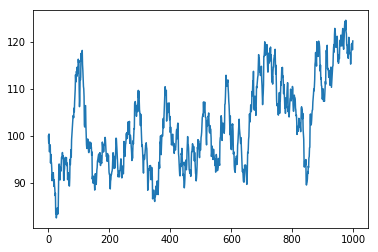

In [8]:
from matplotlib import pyplot as plt
plt.plot(randomStock)

In [ ]:
#Testing to see if tensorflow works.
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

In [ ]:
randomStock = array(randomStock).reshape(1000,1)

In [ ]:
len(randomStock)

In [ ]:
randomStock